In [228]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as stats
%matplotlib inline

In [229]:
def calc_revenue(population, price, n_sessions, fraction, commission ):
    """Calculates the revenue per year for a category
    population - number of inhabitants at a location
    price - price per visit or session
    n_sessions - number of sessions i.e. appointments
    fraction - fraction of the inhabitants expected to be captured
    commission - commission charged per transaction (between 0.03 - 0.06)"""
    ave_spend_year = n_sessions * price # average spent in a year
    pop_captured = population * fraction # population captured
    business_captured = ave_spend_year * pop_captured
    revenue_year = business_captured * commission
    return(revenue_year)

# Test case from spreadsheet should result in 444000
n_inhabitants0 = 1480000
spend_per_visit = 20
n_visits0 = 6
fraction_captured0 = 0.1
commission0 = 0.025
print(calc_revenue(n_inhabitants0,spend_per_visit, n_visits0, fraction_captured0, commission0))

444000.0


In [230]:
def plot_sim_res(sim_res0, xlabel, title):
    h = sorted(sim_res0)
    fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
    tmp = plt.plot(h,fit,'-')
    tmp = plt.hist(h,bins = 50, density=True)      #use this to draw histogram of your data
    plt.xlabel(xlabel)
    plt.title(title)

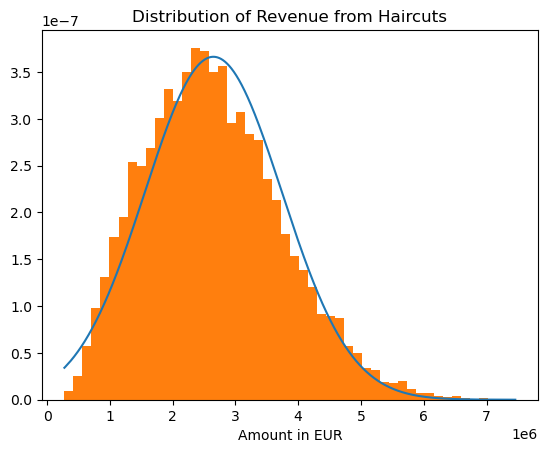

In [231]:
def sim_category(n_simulations, population, price, n_visits, frac, commission):
    """Simulates a single category of service over a year
    n_simulations - number of simulations
    population - population of the city or location
    price - price per session
    n_visit - number of visits per year
    frac - fraction of population captured
    commission - commission charged per transaction (between 0.03 - 0.06)
    requires on calc_revenue()
    """
    var_matrix = np.array([frac, price, n_visits])
    var_samples0 = [] # array to store all the list of samples of variables
    for i in var_matrix:
        var_samples0.append(np.random.default_rng().triangular(i[0], i[1], i[2], n_simulations))
    
    sim_res0 = [] # store the result of a single simulation
    for i in range(0, len(var_samples0[0])): # n_simulation == len(var_samples[0])
        res0 = calc_revenue(population, var_samples0[1][i], var_samples0[2][i], var_samples0[0][i], commission )
        sim_res0.append(res0)
    return sim_res0

n_simulations = 10000 # number of samples to generate
city_inhabitants = 14800000 # number of inhabitants in of city

# all monte carlo modelled values have a minimum, mode and maximum estimate
# average spend for appointment; monte carlo modelling of class
haircut = [54, 77, 99] # minimum, mode, maximum cost per appointment
n_visits = [3, 6, 10] # model number of visits a year
frac = [0.001, 0.0075, 0.010] # fraction of population captured
commission = 0.06 # commission charged 0.05 means 5% of transaction cost

revenue0 = sim_category(n_simulations, city_inhabitants, haircut, n_visits, frac, commission)
plot_sim_res(revenue0, 'Amount in EUR', 'Distribution of Revenue from Haircuts')

In [240]:
n_simulations = 10000 # number of samples to generate
city_inhabitants = 14800000 # number of inhabitants in of city

# all monte carlo modelled values have a minimum, mode and maximum estimate
# average spend for appointment; monte carlo modelling of class
haircut = [54, 77, 99] # minimum, mode, maximum cost per appointment
n_visits = [3, 6, 10] # model number of visits a year
frac = [0.01, 0.075, 0.10] # fraction of population captured
commission = 0.06 # commission charged 0.05 means 5% of transaction cost

def sim_category(n_simulations, population, cost, n_visits, frac, commission):
    var_matrix = np.array([frac, cost, n_visits])
    var_samples0 = [] # array to store all the list of samples of variables
    for i in var_matrix:
        var_samples0.append(np.random.default_rng().triangular(i[0], i[1], i[2], n_simulations))
    
    sim_res0 = [] # store the result of a single simulation
    for i in range(0, len(var_samples0[0])): # n_simulation == len(var_samples[0])
        res0 = calc_revenue(population, var_samples0[1][i], var_samples0[2][i], var_samples0[0][i], commission )
        sim_res0.append(res0)
    return sim_res0

def plot_sim_res(sim_res0, xlabel, title):
    h = sorted(sim_res0)
    fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
    tmp = plt.plot(h,fit,'-')
    tmp = plt.hist(h,bins = 50, density=True)      #use this to draw histogram of your data
    plt.xlabel(xlabel)
    plt.title(title)

revenue0 = sim_category(n_simulations, city_inhabitants, haircut, n_visits, frac, commission)
plot_sim_res(revenue0, 'Amount [EUR]', 'Distribution of Revenue from Haircuts')

In [233]:
# Single cell sim for beauty
beauty = [24, 64, 103] # these values need references
n_visits = [2, 4, 6] # model number of visits a year
frac = [0.001, 0.0025, 0.0075] # fraction of population captured
commission = 0.05 # commission charged 0.05 means 5% of transaction cost

revenue_beauty = sim_category(10000, 1480000, beauty, n_visits, frac, 0.05)

In [234]:
# Single cell sim for hair
hair = [53, 77, 99] # these values need references
n_visits = [3, 6, 10] # model number of visits a year
frac = [0.001, 0.0025, 0.0075] # fraction of population captured
commission = 0.05 # commission charged 0.05 means 5% of transaction cost

revenue_hair = sim_category(10000, 1480000, hair, n_visits, frac, 0.05)

In [235]:
# Single cell sim for fitness
n_simulations = 10000 # number of samples to generate
city_inhabitants = 1480000 # number of inhabitants in of city
fitness = [40, 55, 90] # these values need references
n_visits = [3, 6, 24] # model number of visits a year
frac = [0.001, 0.0025, 0.005] # fraction of population captured
commission = 0.05 # commission charged 0.05 means 5% of transaction cost

revenue_fitness = sim_category(n_simulations, city_inhabitants, fitness, n_visits, frac, commission)

In [241]:
# Add the revenue modelling for each category for total revenue
revenue_total = np.array(revenue_beauty) + np.array(revenue_hair) + np.array(revenue_fitness)
plot_sim_res(revenue_total, '[EUR]', 'Distribution of Total Revenue')

In [237]:
# Model validation - the revenue should be 444000 EUR
n_simulations = 10000 # number of samples to generate
city_inhabitants = 14800000 # number of inhabitants in of city
fitness = [19.99, 20, 20.01] # these values need references
n_visits = [5.999, 6, 6.001] # model number of visits a year
frac = [0.0099, 0.01, 0.0101] # fraction of population captured
commission = 0.025 # commission charged 0.05 means 5% of transaction cost

revenue_fitness = sim_category(n_simulations, city_inhabitants, fitness, n_visits, frac, commission)
plot_sim_res(revenue_fitness, 'EUR', 'Model validation')

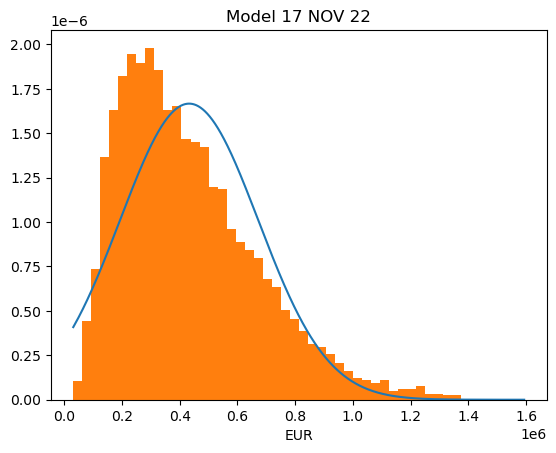

In [242]:
# Model validation Cell
n_simulations = 10000 # number of samples to generate
city_inhabitants = 14800000 # number of inhabitants in of city
hair0 = [15, 20, 40] # these values need references
n_visits = [7, 10, 15] # model number of visits a year
frac = [0.0005, 0.0025, 0.01] # fraction of population captured
commission = 0.025 # commission charged 0.05 means 5% of transaction cost

revenue_hair0 = sim_category(n_simulations, city_inhabitants, hair0, n_visits, frac, commission)
plot_sim_res(revenue_hair0, 'EUR', 'Model 17 NOV 22')